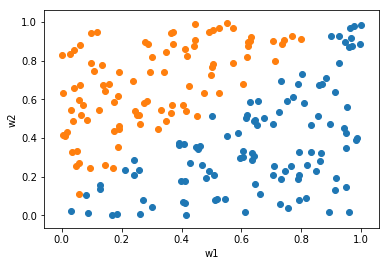

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#按照一定规律均匀分布含有两个特征的数据点
def createData(samplecnt,coef=1.0,intercept=0.05):
    x1 = np.random.uniform(0,1,samplecnt)
    x2 = np.random.uniform(0,1,samplecnt)
    index = (x2-intercept)/x1 <coef
    x1_pos = x1[index]
    x2_pos = x2[index]
    index = (x2-intercept)/x1 >=coef
    x1_neg = x1[index]
    x2_neg = x2[index]
    plt.xlabel("w1")
    plt.ylabel("w2")
    plt.scatter(x1_pos,x2_pos)
    plt.scatter(x1_neg,x2_neg)
    regx = np.linspace(0,1,samplecnt)
    regy = coef*regx+intercept
    #plt.plot(regx,regy,color='g')
    plt.show()
    return x1_pos,x1_neg,x2_pos,x2_neg
#组合成原始数据
def combine_data(x1_pos,x1_neg,x2_pos,x2_neg):
    x1_pos_1 = x1_pos.reshape(-1,1)
    x2_pos_1 = x2_pos.reshape(-1,1)
    x_pos = np.concatenate((x1_pos_1,x2_pos_1),axis=1)
    x_pos_shape =  np.shape(x_pos)
    y_pos = np.ones(x_pos_shape[0])
    y_pos = y_pos.reshape(-1,1)
    data_pos = np.concatenate((x_pos,y_pos),axis=1)
    x1_neg_1 = x1_neg.reshape(-1,1)
    x2_neg_1 = x2_neg.reshape(-1,1)
    x_neg = np.concatenate((x1_neg_1,x2_neg_1),axis=1)
    x_neg_shape =  np.shape(x_neg)
    y_neg = np.zeros(x_neg_shape[0])
    y_neg = y_neg.reshape(-1,1)
    data_neg = np.concatenate((x_neg,y_neg),axis=1)
    data = np.vstack((data_pos,data_neg))
    data = np.random.permutation(data)
    return data

x1_pos,x1_neg,x2_pos,x2_neg = createData(200)
data = combine_data(x1_pos,x1_neg,x2_pos,x2_neg)




In [4]:
'偏移量 b shape=(200,1)'
b = np.ones(200).reshape(-1,1)
'将偏移量与2个特征值组合 shape = (200,3)'
data = np.hstack((b,data))

#data中第一列为偏置项
#第二列为第一个特征
#第三列为第二个特征
#第四列为标签值

data


array([[ 1.        ,  0.62176479,  0.89717568,  0.        ],
       [ 1.        ,  0.94850476,  0.3460985 ,  1.        ],
       [ 1.        ,  0.52470078,  0.97023675,  0.        ],
       [ 1.        ,  0.05961632,  0.67430337,  0.        ],
       [ 1.        ,  0.40353568,  0.06709823,  1.        ],
       [ 1.        ,  0.7036515 ,  0.47146513,  1.        ],
       [ 1.        ,  0.71157468,  0.79940175,  0.        ],
       [ 1.        ,  0.79185594,  0.07933655,  1.        ],
       [ 1.        ,  0.6354002 ,  0.28561971,  1.        ],
       [ 1.        ,  0.05652553,  0.10832418,  0.        ],
       [ 1.        ,  0.78970762,  0.19074113,  1.        ],
       [ 1.        ,  0.41251384,  0.85928314,  0.        ],
       [ 1.        ,  0.2998848 ,  0.81757165,  0.        ],
       [ 1.        ,  0.46970769,  0.26056731,  1.        ],
       [ 1.        ,  0.92712171,  0.92545075,  1.        ],
       [ 1.        ,  0.55289587,  0.99296063,  0.        ],
       [ 1.        ,  0.

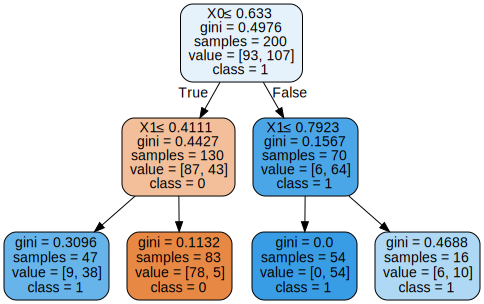

In [33]:
import graphviz
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(data[:,[1,2]], data[:,3])
dot_data = tree.export_graphviz(clf, out_file=None,                        
                         class_names=["0","1"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 




In [31]:
def decisionTreeBoundary(data,n_classes=2,plot_colors = "yb",plot_step = 0.02):
    #特征的列index
    pairidx,pair = [1,2],[1,2]
    X = data[:,[1,2]]
    y = data[:,3]
    # Train
    #构造的无参数构造函数
    clf = tree.DecisionTreeClassifier(max_depth=2)
    clf.fit(X, y)
    # 绘制决策边界
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.BrBG)
    # 绘制训练点
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        clabel=np.array(i,dtype=np.str)
        plt.scatter(X[idx, 0], X[idx, 1], c=color,label = clabel,
                   cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")
    plt.xlabel("w1")
    plt.ylabel("w2")
    plt.title("using decision tree to binary classification")
    plt.show()

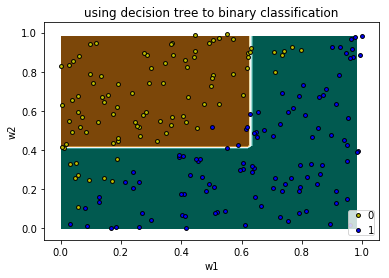

In [32]:
decisionTreeBoundary(data)